This notebook explains the basics of running simulations and plotting the results.  
See the subsequent notebooks for more in-depth guides to the various options available.  

In [1]:
# First, set up the notebook so that plots appear inline
%matplotlib inline
# and import numpy for setting the random seed
import numpy as np

# Setting up and running simulations

In [2]:
# Import the Parameters class. 
# This is used to set up all simulations
from clone_competition_simulation import Parameters

The Parameters object is used to define all aspects of the simulation to be run. 
This includes
- the algorithm used
- the length of the simulation
- the size of the cell population
- the initial clones 
- any mutations that will appear during the simulation
- and many more options 

For a more comprehensive list of options, see the Parameters docstring

In [3]:
p = Parameters(
    algorithm='Moran',  # We will run a non-spatial Moran simulation. 
    initial_size_array=[100, 100, 100],   # There are three initial clones, with 100 cells in each
    fitness_array=[1, 1.02, 1.04],  # Each clone has a different fitness value
    division_rate=1.4,  # Set average division rate for all cells is at 1.7 per time unit
    max_time=25,  # Run for 10 time units
)

============== Setting up ==============
10500 simulation_steps
Using the default mutation rate: 0


Now that the parameters for the simulations have been defined, we can create and run the simulatiosn themselves

In [4]:
sim = p.get_simulator()
sim.run_sim()

If we want to run another simuation with the same parameters but a different random sequence, we can get another simulation from the parameters object

In [5]:
sim2 = p.get_simulator()
sim2.run_sim()

# The results are not identical to the first simulation because the random sequences are different
# E.g. the population arrays (which contain all of the clone sizes) are not the same
np.all(sim.population_array.toarray() == sim2.population_array.toarray())

False

For reproducibility, you can set the numpy random seed before running the simulation

In [6]:
sim3 = p.get_simulator()
np.random.seed(0)
sim3.run_sim()

sim4 = p.get_simulator()
np.random.seed(0)
sim4.run_sim()

# Here the population arrays are equal
np.all(sim3.population_array.toarray() == sim4.population_array.toarray())

True

# Viewing simulation results

The simulation has now been run, and we can look at some of the simulation results. This is just a few quick examples.     
The particular functions appropriate for extracting and plotting the results will depend on the setup of the simulations, in particular whether new mutations occur during the simulations or whether they all mutations/clones in the simulation exist from the start.   
See the other tutorial notebooks for further details. 

In [12]:
# You can see some information on the clones in the simulation
# This function returns a more readable version of the sim.clones_array which stores this information
sim2.view_clone_info()

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1.00,0,-1,None
1,1,0,1.02,0,-1,None
2,2,0,1.04,0,-1,None


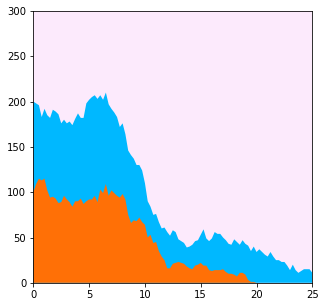

In [8]:
# The Muller plot shows the sizes of each clone over time
sim.muller_plot(figsize=(5, 5));

In [9]:
# The population array stores the clone sizes. 
# Each row is a unique clone. If new mutations occur, they start on a new row. 
# It is a scipy.sparse array, so use .toarray() to convert to a numpy array
sim.population_array.toarray()

array([[100., 109., 115., 113., 115., 102.,  94.,  95.,  93.,  88.,  89.,
         96.,  92.,  89.,  84.,  90.,  90.,  93.,  87.,  90.,  92.,  92.,
         96.,  89., 103.,  99., 109.,  96., 102.,  99.,  96.,  94.,  98.,
         92.,  75.,  66.,  69.,  68.,  72.,  67.,  64.,  50.,  53.,  44.,
         45.,  35.,  29.,  25.,  16.,  16.,  21.,  22.,  23.,  22.,  21.,
         18.,  16.,  15.,  19.,  20.,  22.,  19.,  19.,  14.,  13.,  14.,
         14.,  14.,  15.,  12.,  10.,  10.,   9.,   7.,  11.,  11.,   9.,
          3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [100.,  89.,  81.,  70.,  77.,  83.,  88.,  96.,  96.,  98.,  87.,
         84.,  84.,  89.,  90.,  91.,  97.,  89.,  95., 108., 110., 113.,
        111., 114., 104., 103., 101., 101.,  90.,  89.,  87.,  78.,  78.,
         72.,  71.,  75.,  68.,  62.,  58.,  57.,  46.,  40.,  31.,  31.,
         31.,  32

In [10]:
# The times in the simulation (which correspond to the columns in sim.population_array) can be accessed
sim.times

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  ])

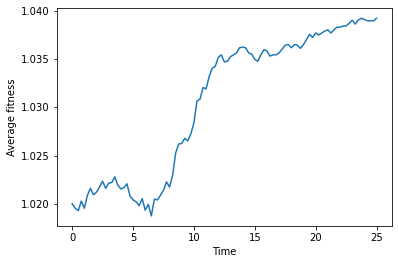

In [11]:
# And various other plotting functions are available. These will be shown in other tutorial notebooks.  
sim.plot_average_fitness_over_time()